### APAN5420 Anomaly Detection - Assignment 3

### Name: Kanyarat Suwannama

# Table of Contents
* **Section 1:** Data Preparation
* **Section 2:** Exploratory Data Analysis
    - the distribution of X, and
    - the distribution of Y by another categorical variable X, and
    - the interactions of two or three variables.
* **Section 3:** Weight of Evidence (WOE) 
* **Section 4:** Conclusion

# Section 1: Data Preparation

In [1]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Use Pandas to do data preparation

In [2]:
df = pd.read_csv("XYZloan_default_selected_vars.csv")

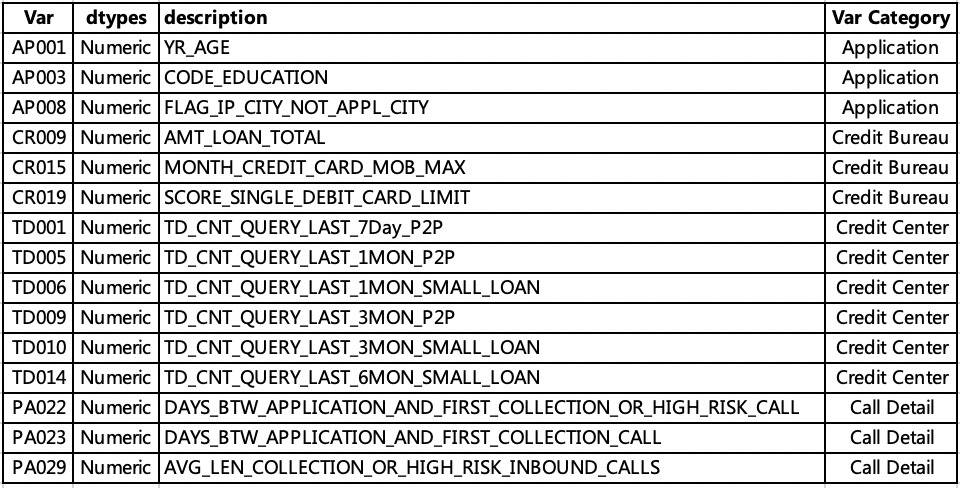

### This is description 

In [3]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
79995,79995,79996,79996,0,39,2,1,12,2017/5/7 13:44,android,...,15.0,8.0,864.0,684.0,1261.0,764.0,2600.0,1074.0,11.0,OPPO
79996,79996,79997,79997,0,31,1,4,12,2017/6/2 15:54,ios,...,25.0,25.0,6177.0,6177.0,6426.0,6426.0,6426.0,6426.0,6.0,IPHONE7
79997,79997,79998,79998,0,37,1,1,12,2017/7/9 8:40,android,...,14.0,13.0,1116.0,1116.0,2061.0,2061.0,2501.0,2061.0,12.0,VIVO
79998,79998,79999,79999,0,38,2,1,12,2017/5/9 10:19,android,...,5.0,2.0,25.0,0.0,498.0,343.0,514.0,343.0,6.0,XIAOMI
79999,79999,80000,80000,1,25,1,3,12,2017/4/27 18:36,h5,...,9.0,9.0,129.0,129.0,167.0,167.0,167.0,167.0,7.0,WEB


In [4]:
# Returns the statistical summary 
df.describe()

,Unnamed: 0.1,Unnamed: 0,id,loan_default,AP001,AP002,AP003,AP004,AP007,AP008,...,CD160,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.00000,80000.000000,...,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.000000,79619.00000,79619.000000,79619.000000,77207.000000
mean,39999.500000,40000.500000,40000.500000,0.193600,31.706913,1.321813,2.014925,11.235413,3.30130,3.117200,...,6.911956,14.271694,11.773358,909.089313,810.786219,1732.693314,1539.33443,2513.226491,2229.606137,5.976272
std,23094.155105,23094.155105,23094.155105,0.395121,7.075070,0.467174,1.196806,2.212313,1.33655,1.306335,...,28.007499,38.235012,33.270641,1379.553332,1245.044602,2441.503517,2172.71384,3404.975112,3005.615048,3.641814
min,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,1.000000,3.000000,1.00000,1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.00000,-99.000000,-99.000000,0.000000
25%,19999.750000,20000.750000,20000.750000,0.000000,27.000000,1.000000,1.000000,12.000000,2.00000,2.000000,...,2.000000,5.000000,4.000000,84.000000,34.000000,309.000000,226.00000,539.000000,414.000000,3.000000
50%,39999.500000,40000.500000,40000.500000,0.000000,30.000000,1.000000,1.000000,12.000000,3.00000,3.000000,...,7.000000,12.000000,10.000000,475.000000,397.000000,1023.000000,870.00000,1553.000000,1324.000000,5.000000
75%,59999.250000,60000.250000,60000.250000,0.000000,35.000000,2.000000,3.000000,12.000000,5.00000,4.000000,...,14.000000,23.000000,20.000000,1209.000000,1080.000000,2287.000000,2030.00000,3296.000000,2936.000000,8.000000
max,79999.000000,80000.000000,80000.000000,1.000000,56.000000,2.000000,6.000000,12.000000,5.00000,5.000000,...,1061.000000,2792.000000,1579.000000,48585.000000,29664.000000,88364.000000,54651.00000,125352.000000,87312.000000,47.000000


<AxesSubplot:>

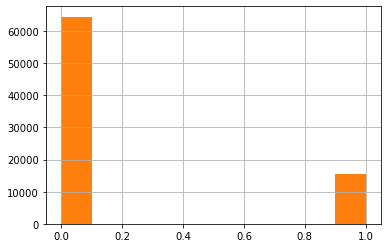

In [5]:
df['loan_default'].hist()
df.loan_default.hist()

In [6]:
df['loan_default'].value_counts()

0    64512
1    15488
Name: loan_default, dtype: int64

In [7]:
# Getting all column names
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')

In [8]:
# Selecting subset of features
features = ['loan_default','AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']
df = df[features]

In [9]:
df.isnull()

,loan_default,AP001,AP003,AP008,CR009,CR015,CR019,PA022,PA023,PA029,TD001,TD005,TD006,TD009,TD010,TD014
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
79998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
missing_values = df.isnull().sum()
missing_values

loan_default      0
AP001             0
AP003             0
AP008             0
CR009             0
CR015             0
CR019             0
PA022           381
PA023           381
PA029           381
TD001             0
TD005             0
TD006             0
TD009             0
TD010             0
TD014             0
dtype: int64

In [11]:
missing_values_per = (df.isnull().sum() / df.isnull().count())
missing_values_per

loan_default    0.000000
AP001           0.000000
AP003           0.000000
AP008           0.000000
CR009           0.000000
CR015           0.000000
CR019           0.000000
PA022           0.004763
PA023           0.004763
PA029           0.004763
TD001           0.000000
TD005           0.000000
TD006           0.000000
TD009           0.000000
TD010           0.000000
TD014           0.000000
dtype: float64

In [12]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values_per = (df.isnull().sum() / df.isnull().count())
pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage'])

,Count_of_Missing,Percentage
loan_default,0,0.000000
AP001,0,0.000000
AP003,0,0.000000
AP008,0,0.000000
CR009,0,0.000000
CR015,0,0.000000
CR019,0,0.000000
PA022,381,0.004763
PA023,381,0.004763
PA029,381,0.004763


In [13]:
r = pd.concat([missing_values, missing_values_per],axis=1, keys = ['Count_of_Missing','Percentage']).reset_index()
r

,index,Count_of_Missing,Percentage
0,loan_default,0,0.000000
1,AP001,0,0.000000
2,AP003,0,0.000000
3,AP008,0,0.000000
4,CR009,0,0.000000
5,CR015,0,0.000000
6,CR019,0,0.000000
7,PA022,381,0.004763
8,PA023,381,0.004763
9,PA029,381,0.004763


In [14]:
def null_cell(df):
    dfx = df.copy()
    missing_values = dfx.isnull().sum()
    missing_values_per = dfx.isnull().sum() / dfx.isnull().count()
    null_values = pd.concat([missing_values, missing_values_per],axis=1, keys = ['the_null','the_null_perc'])
    null_values = null_values.sort_values('the_null',ascending=False)
    return null_values[null_values['the_null']>0]

fill_list = (null_cell(df)).index
fill_list

Index(['PA022', 'PA023', 'PA029'], dtype='object')

* Pandas uses .loc to locate elements in a data frame. 
* The following block first finds the columns with missing values: df_mean.loc[:,col]
* Then use fillna() to impute the missing values with the average values.
Use the for-loop function to impute missing values for those columns

In [15]:
r.loc[r['index']=='type','Percentage']

Series([], Name: Percentage, dtype: float64)

In [16]:
df_mean = df # Do you know this is different from "df_mean = df.copy()?"" This just point to the same data frame. It does not create a copy.
df_mean = df.copy() # Here create a physical copy of df.

In [17]:
for col in fill_list:
    df_mean.loc[:,col].fillna(df_mean.loc[:,col].mean(),inplace=True)

# Section 2: Exploratory Data Analysis

### Create categorical variables in Python

In [18]:
features1 = ['AP001', 'AP003', 'AP008', 'CR009', 'CR015', 'CR019', 'PA022', 'PA023', 'PA029', 'TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

In [19]:
# You can write a function and loop through 
def binning(var):
    percentile = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
    df[var + '_bin'] = pd.qcut(df[var], 10, duplicates='drop').values.add_categories("NoData")
    df[var + '_bin'] = df[var + '_bin'].fillna("NoData").astype(str)
    df[var + '_bin'].value_counts(dropna=False)

for i in features1:
    binning(i)
 
features_bin = [f + '_bin' for f in features1]
features_bin

['AP001_bin',
 'AP003_bin',
 'AP008_bin',
 'CR009_bin',
 'CR015_bin',
 'CR019_bin',
 'PA022_bin',
 'PA023_bin',
 'PA029_bin',
 'TD001_bin',
 'TD005_bin',
 'TD006_bin',
 'TD009_bin',
 'TD010_bin',
 'TD014_bin']

### Type 1: Showing the Distribution of X

### Histogram
- To plot the histogram to understand the distribution of each of the variables.

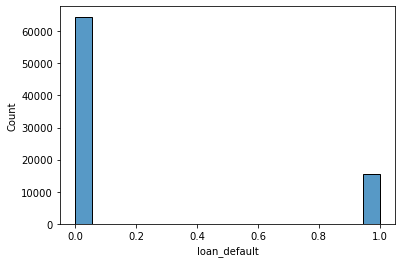

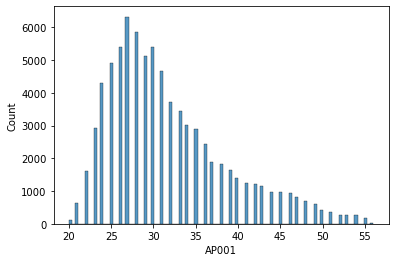

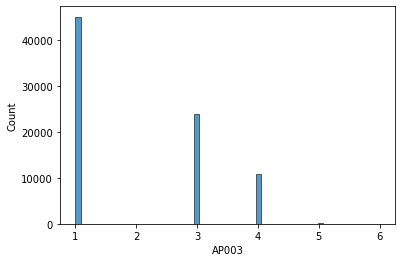

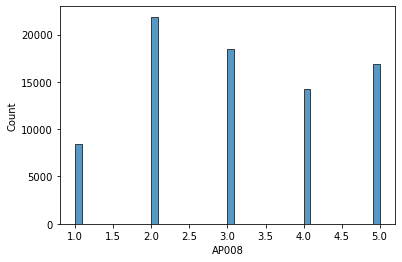

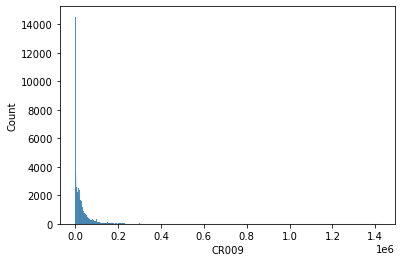

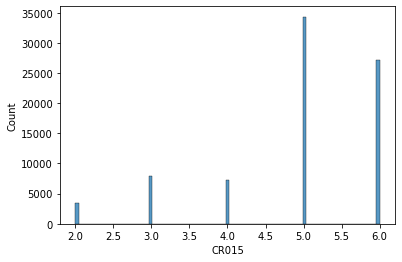

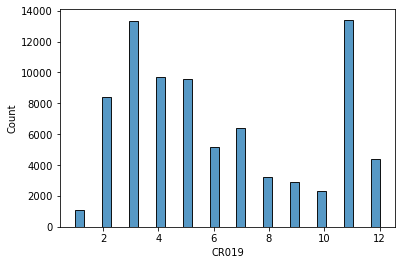

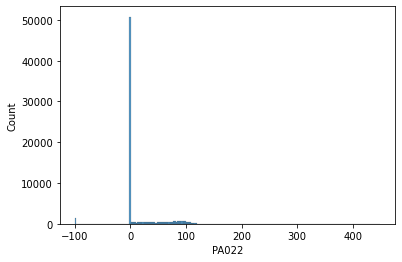

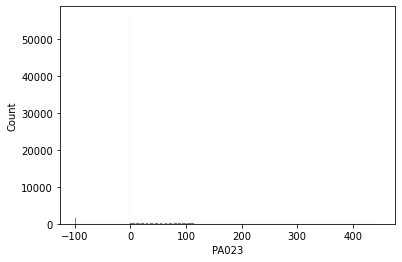

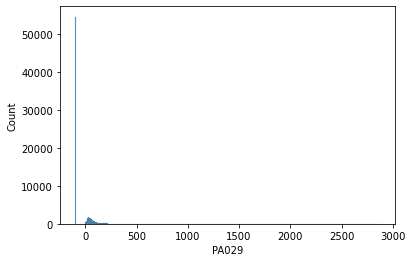

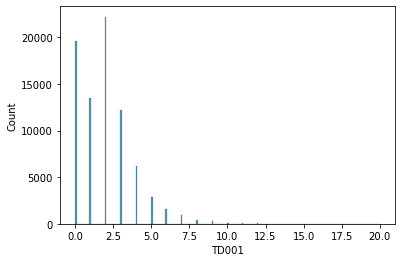

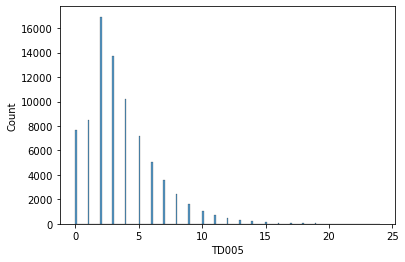

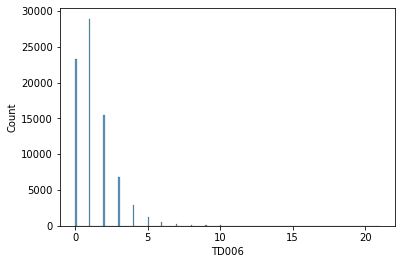

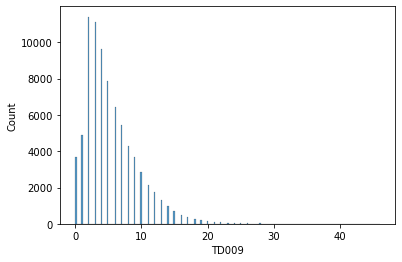

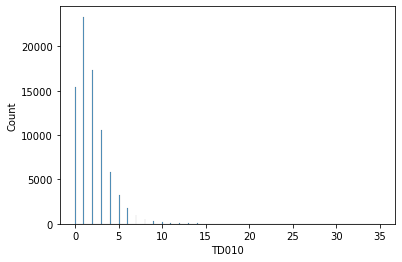

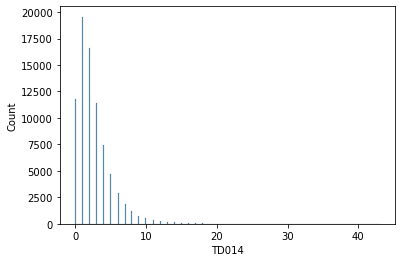

In [20]:
# Without the bins attributes
for i in features:
    plt.figure(figsize=(6,4))
    sns.histplot(x=i, data=df)

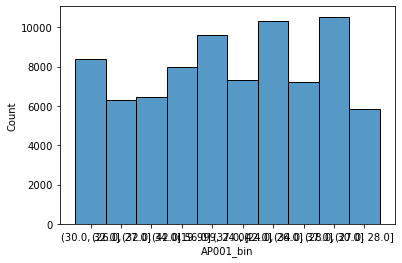

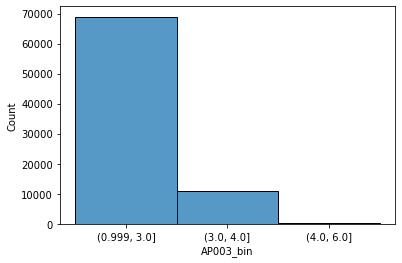

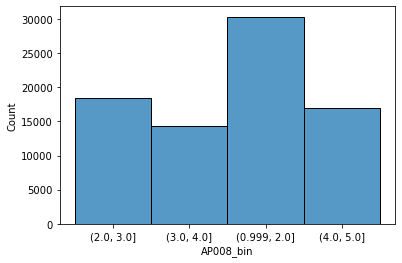

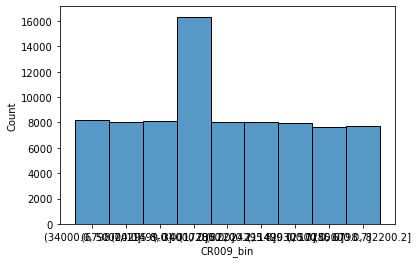

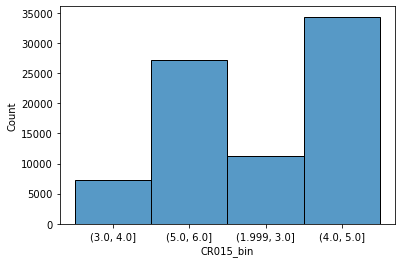

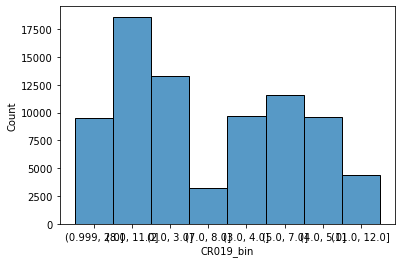

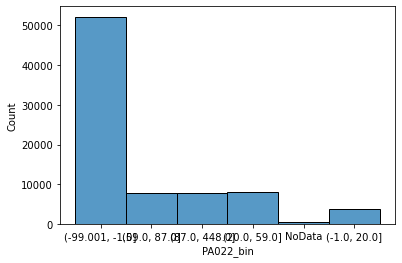

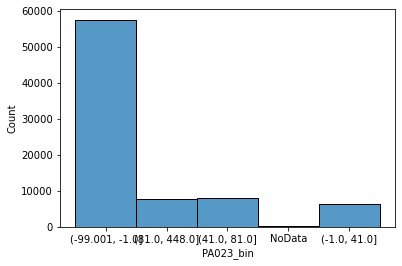

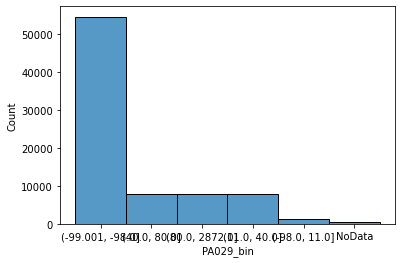

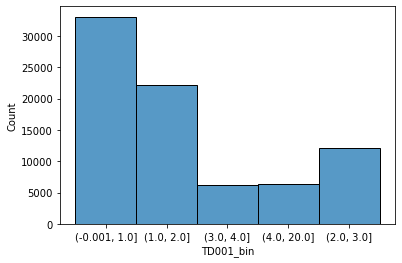

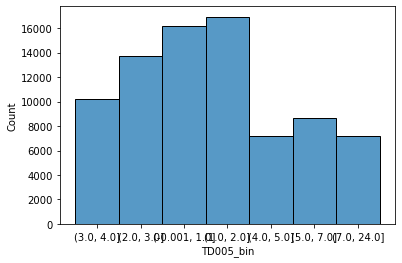

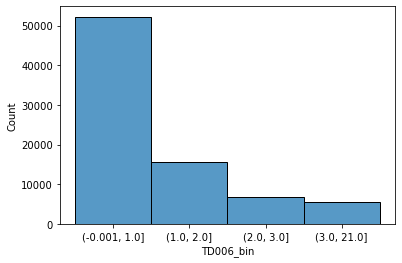

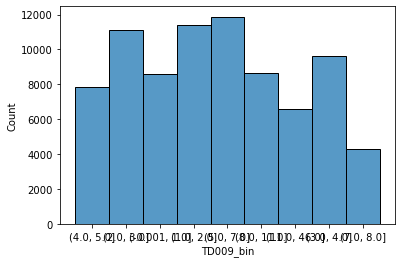

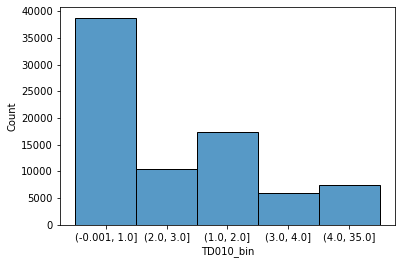

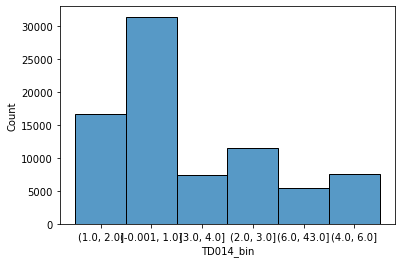

In [21]:
# With the bins attributes
for i in features_bin:
    plt.figure(figsize=(6,4))
    sns.histplot(x=i, data=df)

### Type 2: Showing the Distribution of Y by Another Categorical Variable

### Box Plot I

- Often we need to know the summary statistics including the minimum, maximum, and median. A box plot displays the five-number summary of a set of data: the minimum, first quartile (Q1, 25%), median (Q2, 50%), third quartile (Q3, 75%), and maximum. The box covers the data from the first quartile to the third quartile.

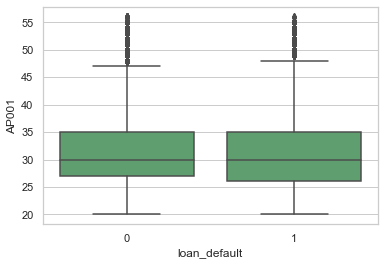

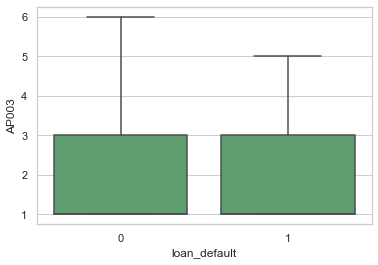

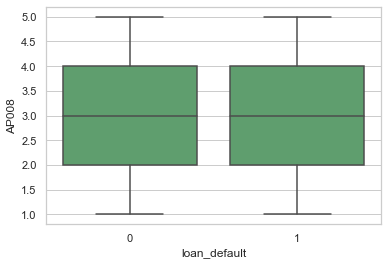

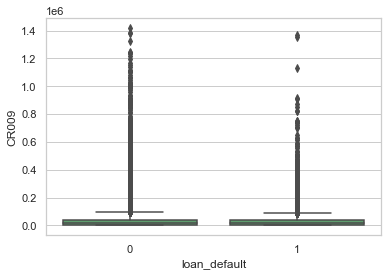

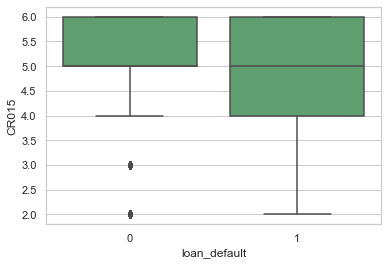

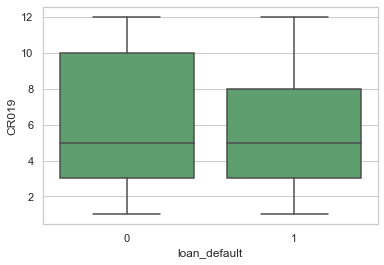

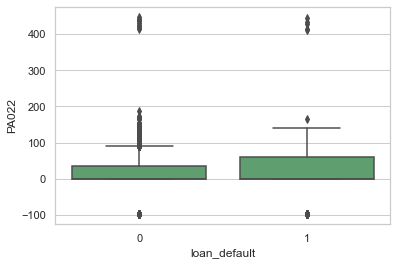

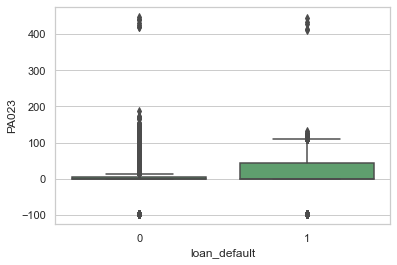

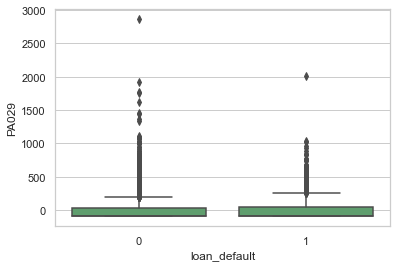

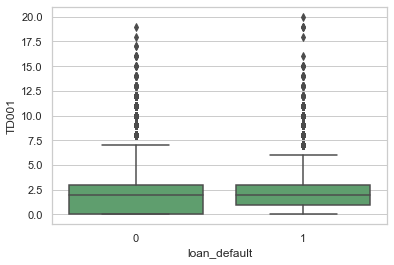

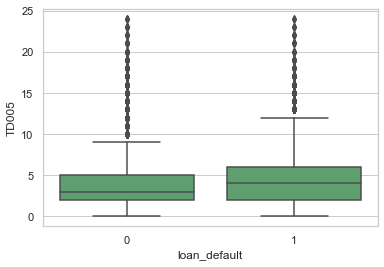

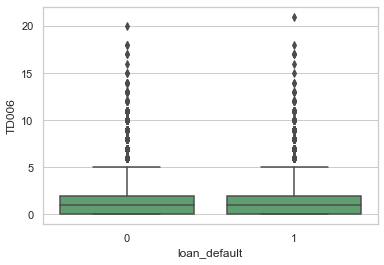

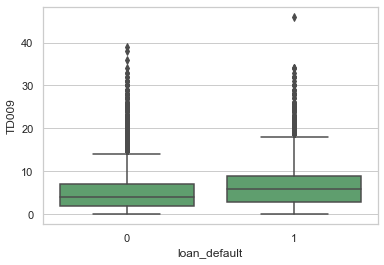

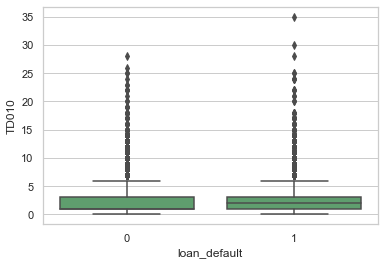

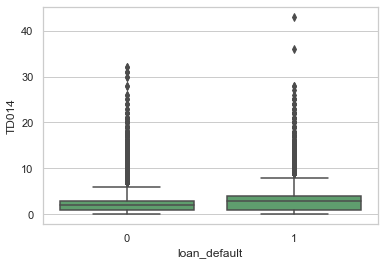

In [22]:
sns.set(style="whitegrid")
for i in features[1:]:
    plt.figure(i)
    sns.boxplot(x="loan_default", y=i, color="g",  data=df)

### Box Plot II
- The Box Plot II, or the “letter-value-plot” will be a better representation of the distribution of the data when there are many outliers.
- From the 2.1 Box Plot I, it is shown that AP001, CR009, PA022, PA023, PA029, TD001, TD005, TD006, TD009, TD010, TD014 variables have large number of outliers. Hence, we deciced to create 2.2 Box Plot II to further explore the differentiation for the outliers. 

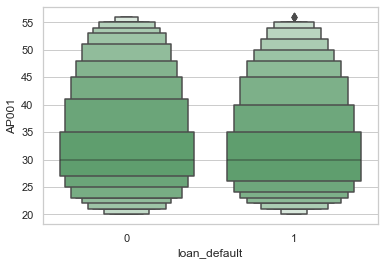

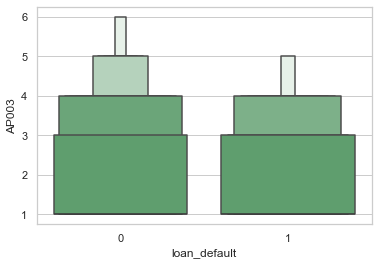

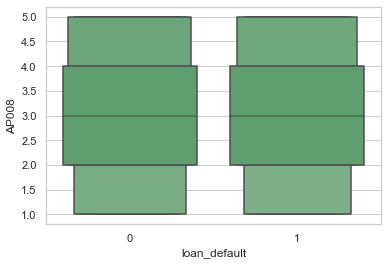

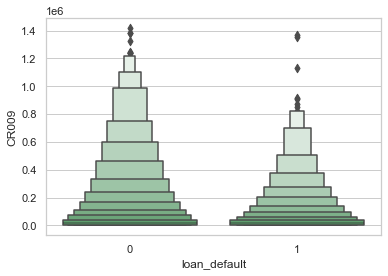

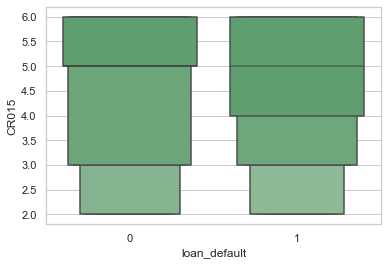

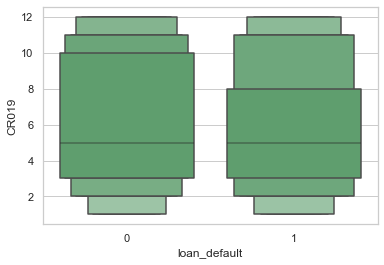

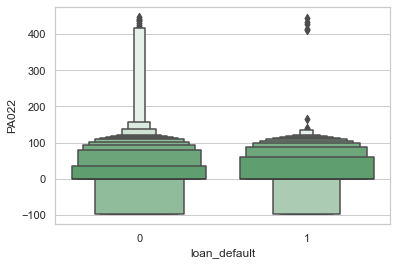

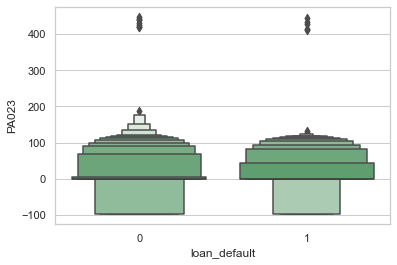

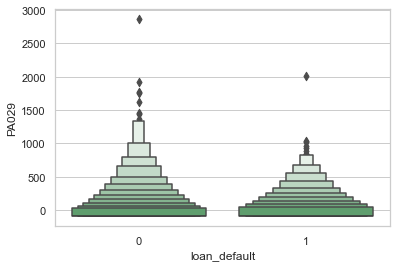

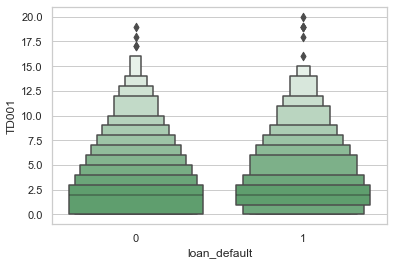

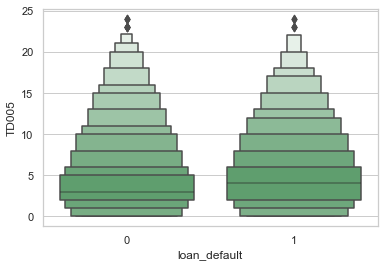

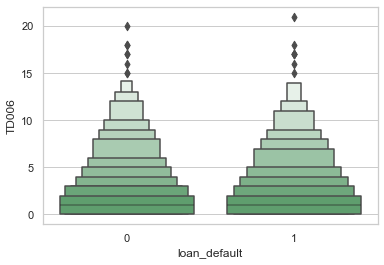

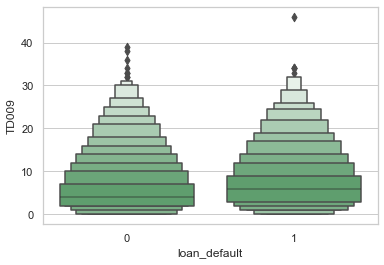

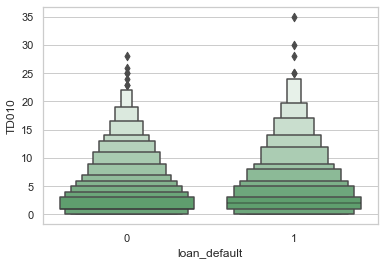

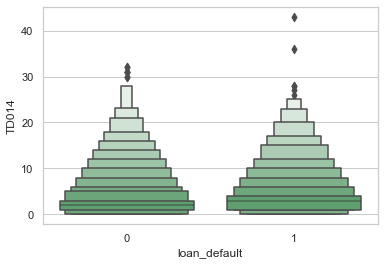

In [23]:
sns.set(style="whitegrid")
for i in features[1:]:
    plt.figure(i)
    sns.boxenplot(x="loan_default", y=i , color="g", scale="linear", data=df)

### Type 3: Showing the Interactions between Variables

### Pairplot
- A pair plot lets us show two important statistics: (a) the distribution of every single variable, and (b) the relationships between two variables.

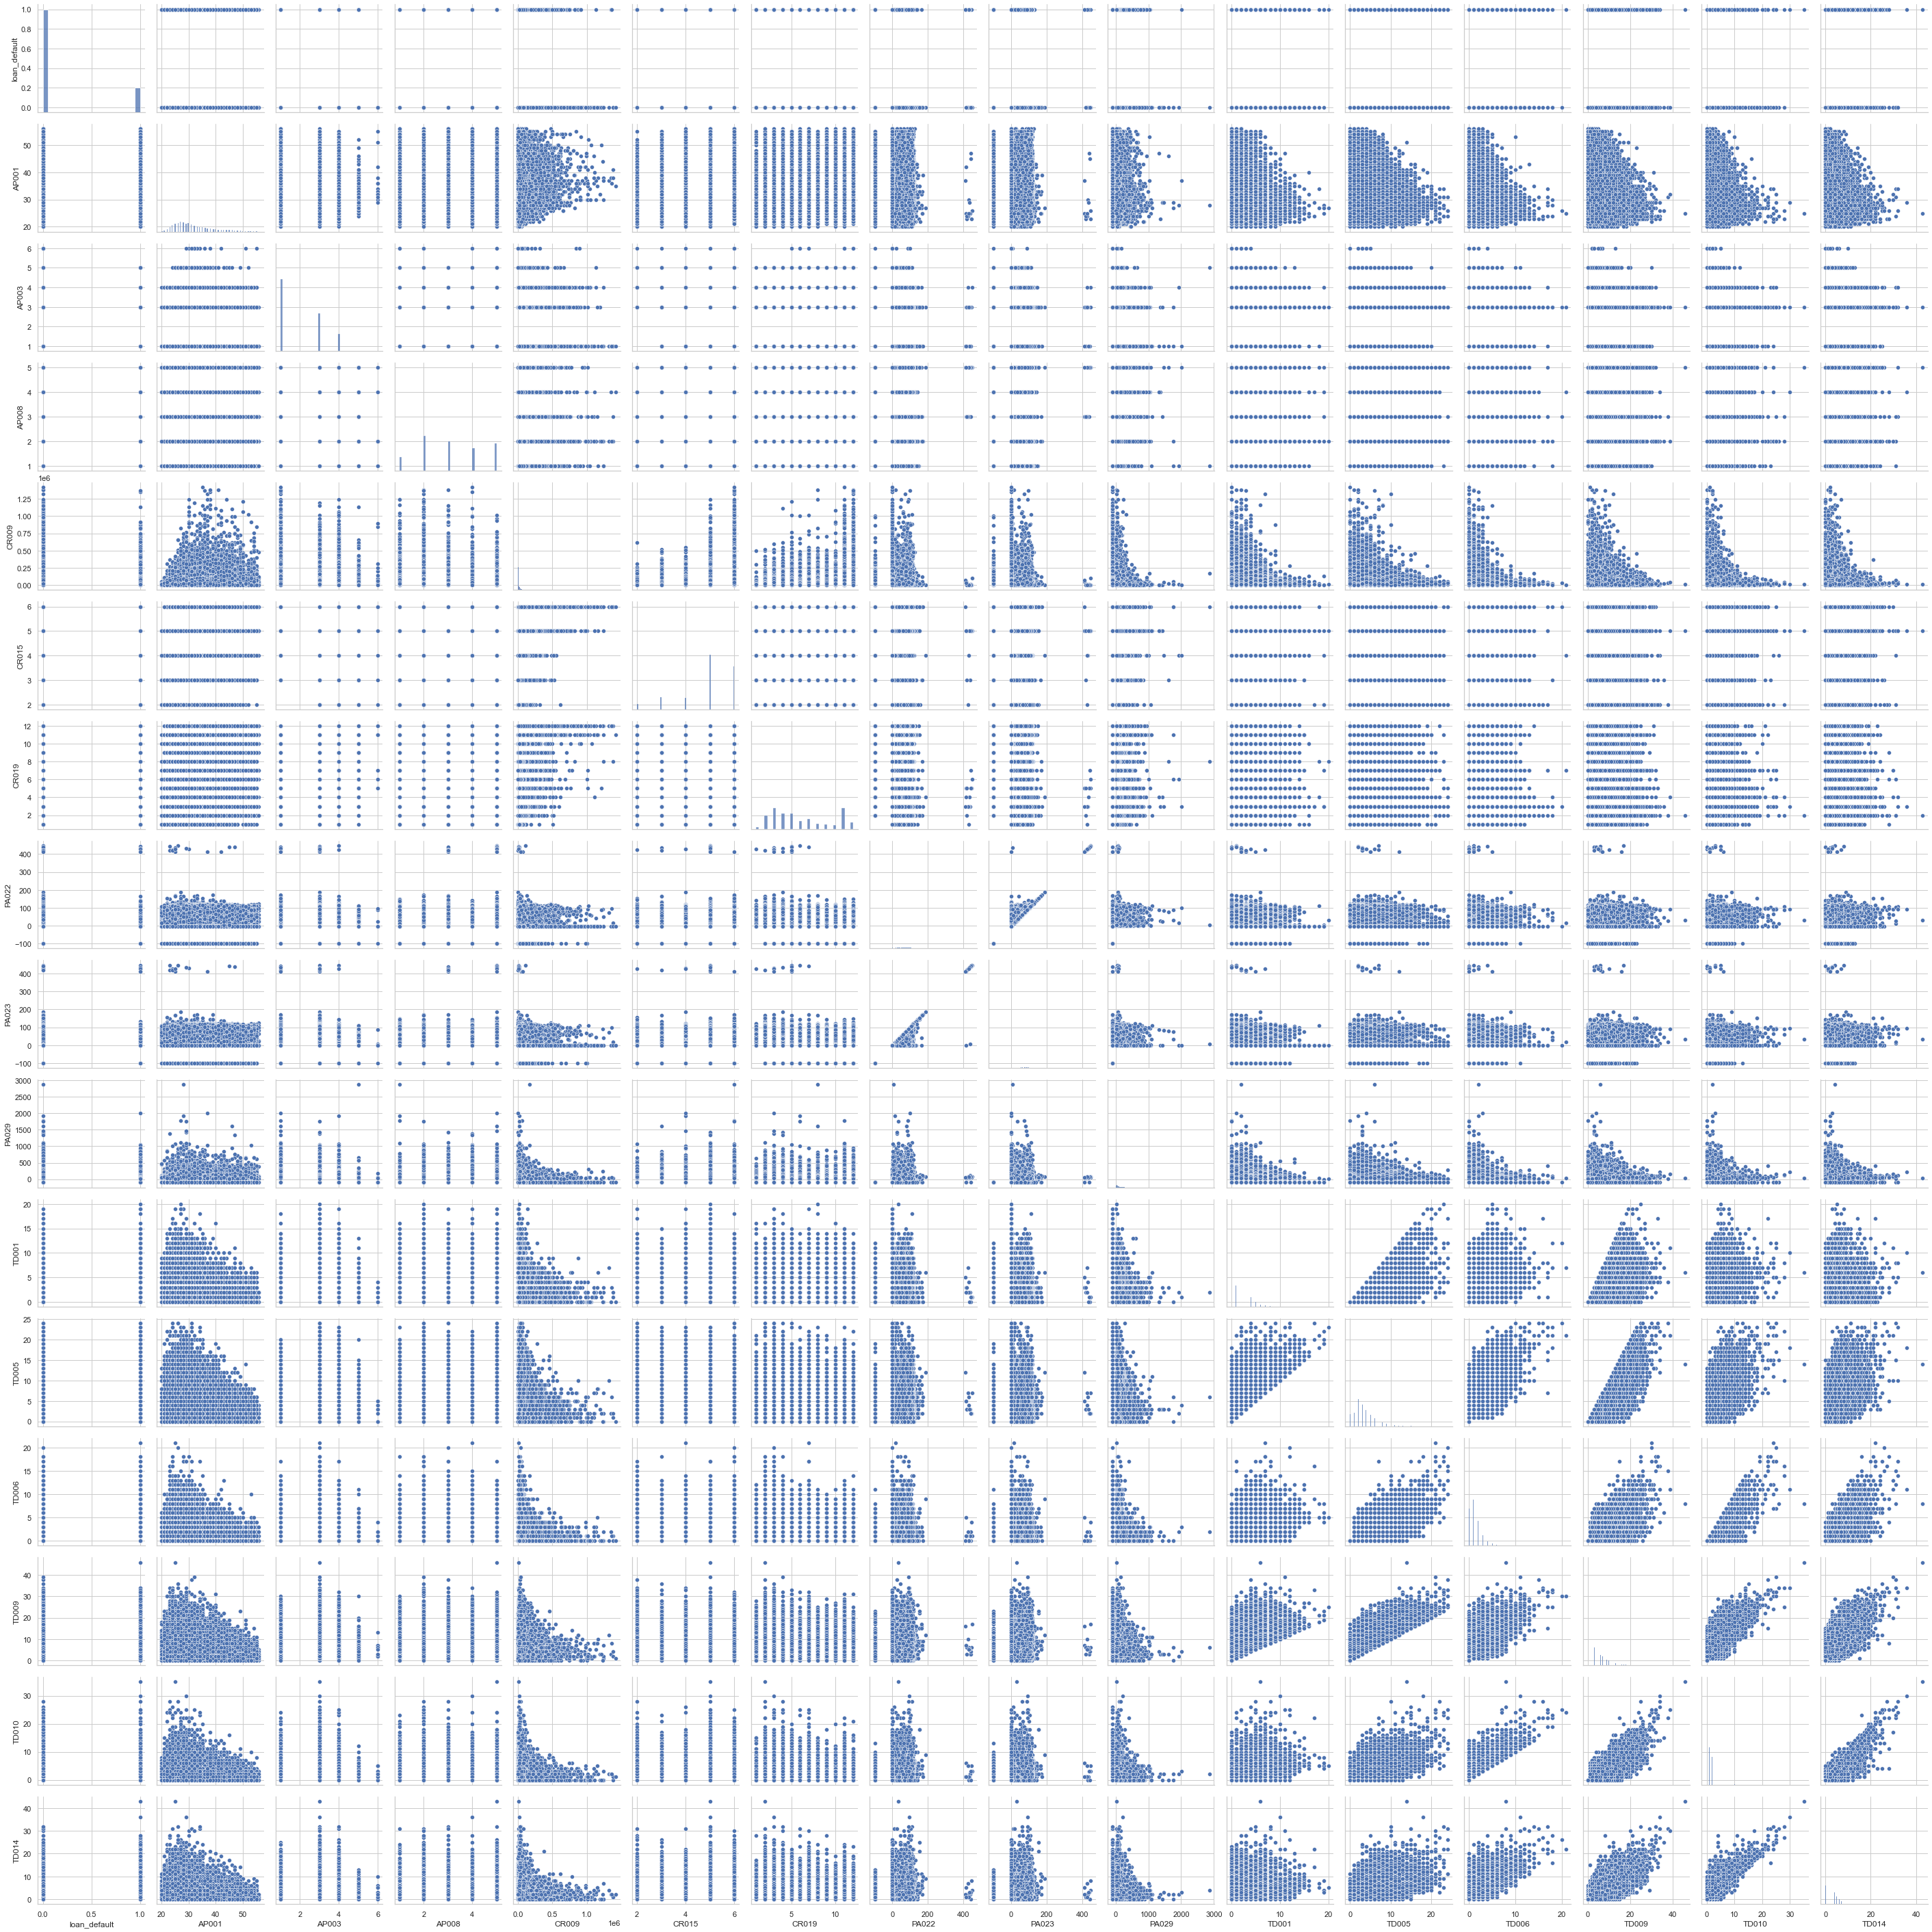

In [24]:
var_list = df.columns
sns.pairplot(df[var_list])

### Heatmap
- A data visualization technique that uses color to visualize the value of the matrix changes depending on the values of two other variables. In this, the brighter colors basically reddish colors represents the more common or or higher activities between the variables and the more green colour represents represent less common or activities between the variables.

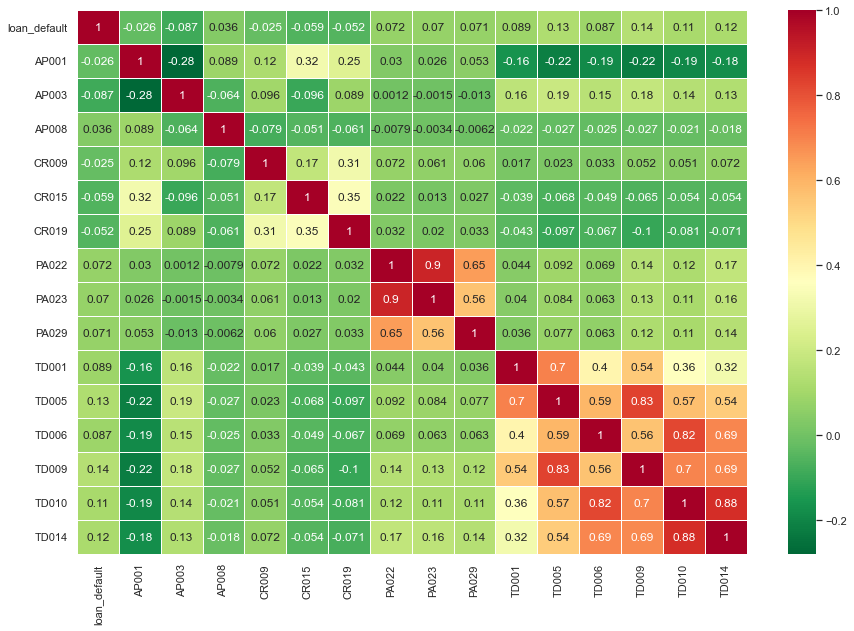

In [25]:
corr_matrix = df.corr()
ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr_matrix, cmap='RdYlGn_r', annot=True, linewidths=.5)
plt.show()

# Section 3: Weight of Evidence (WOE) 

Weight of evidence (WOE) is a widely used technique in credit risk modeling or called the probability of default modeling (such models predict how capable an applicant can repay the loan).

The goal of such transformation is to get the maximum difference among the binned categories relating to the target variable. It counts the number of responders and non-responders in each binned category, then assigns a numeric value to each of the binned categories. 

In this dataset, the target variable “loan default” has two values: “1” means a customer cannot repay the loan (loan default, or a bad loan), and “0” means a customer can repay the loan (a good loan).

- First, I create a “NoData” category to make sure missing values are counted as a category
- For each category, I count the total records and the number of “good” records. 
- I then derive the percentage of the “good” and “bad” records. 
- The WOE value is the odd ratio between the “good” and “bad” percentages.

In [26]:
#######################
# My Function for WOE #
#######################

def WOE(var):
    try:
        df[var] = df[var].fillna('NoData')
    except:
        pass
    k = df[[var,'loan_default']].groupby(var)['loan_default'].agg(['count','sum']).reset_index()
    k.columns = [var,'Count','Bad']
    k['Good'] = k['Count'] - k['Bad']
    k['Good %'] = (k['Good'] / k['Good'].sum()*100).round(2)
    k['Bad %'] = (k['Bad'] / k['Bad'].sum()*100).round(2)
    ratio = k['Good %'] / k['Bad %']
    k[var+'_WOE'] = np.log(ratio).round(2)
    k = k.sort_values(by=var+'_WOE')
    return(k)

#### Passing the WOE function for the variable “Year_Age” or AP001

In [27]:
k = WOE('AP001')
k.head()

,AP001,Count,Bad,Good,Good %,Bad %,AP001_WOE
1,21,623,165,458,0.71,1.07,-0.41
0,20,113,25,88,0.14,0.16,-0.13
7,27,6323,1337,4986,7.73,8.63,-0.11
2,22,1626,339,1287,1.99,2.19,-0.10
35,55,165,34,131,0.20,0.22,-0.10


#### Appending the WOE value of the variable back to the original data

In [28]:
df1 = pd.merge(df[['loan_default','AP001']],k[['AP001', 'AP001_WOE']], left_on='AP001', right_on= 'AP001',how='left')
df1.head()

,loan_default,AP001,AP001_WOE
0,1,31,-0.01
1,0,27,-0.11
2,0,33,0.03
3,0,34,0.04
4,0,47,0.01


#### Creating Bins for each variable

In [29]:
for i in features[1:]:
    var = i
    binned_var = var + '_D'
    percentile = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
    df[binned_var] = pd.qcut( df[var],percentile,duplicates='drop')

#### Selecting the bins attributes for respective variables

In [30]:
features2 = ['AP001_D', 'AP003_D', 'AP008_D', 'CR009_D', 'CR015_D','CR019_D', 'PA022_D', 'PA023_D', 'PA029_D', 'TD001_D', 'TD005_D','TD006_D', 'TD009_D', 'TD010_D', 'TD014_D']

#### Plotting the distribution across each bins

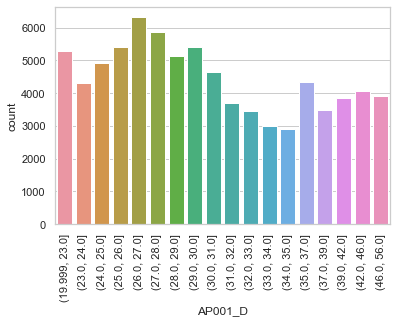

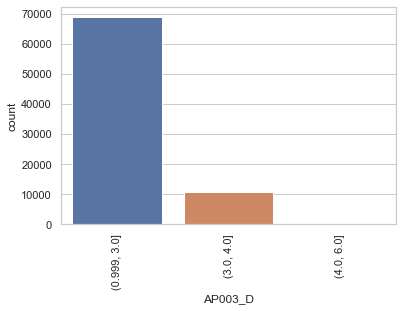

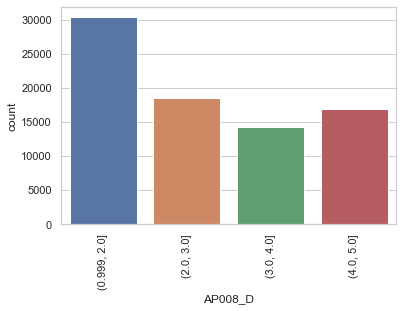

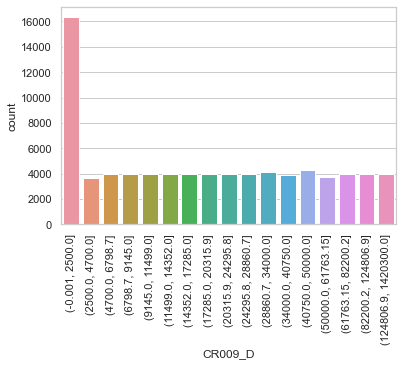

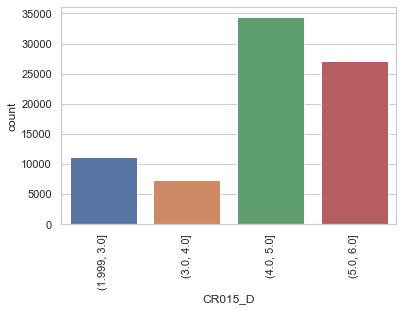

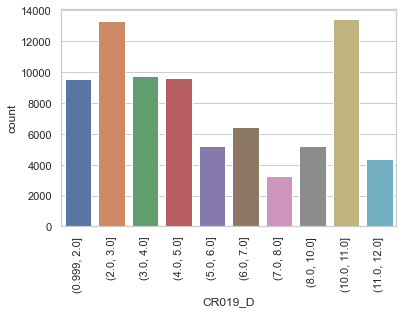

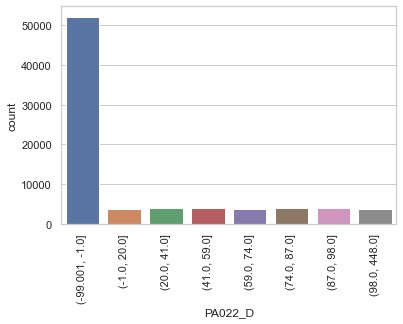

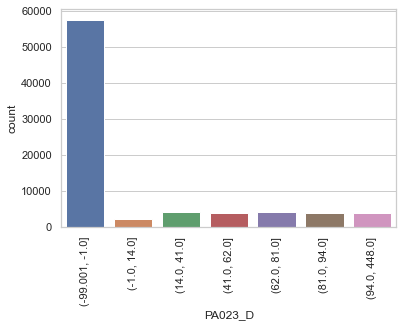

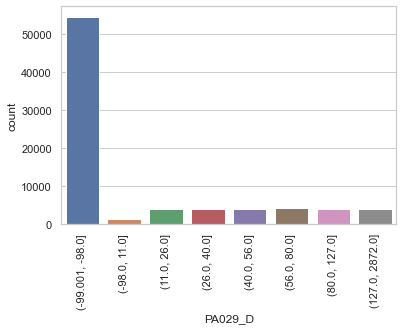

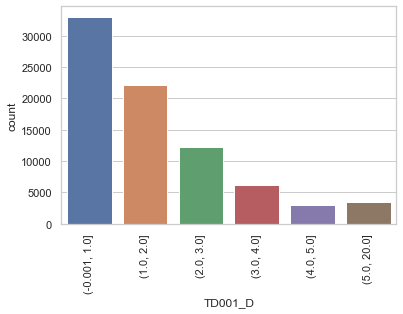

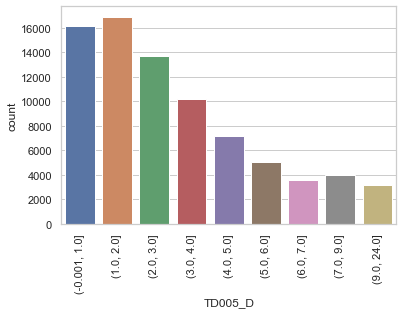

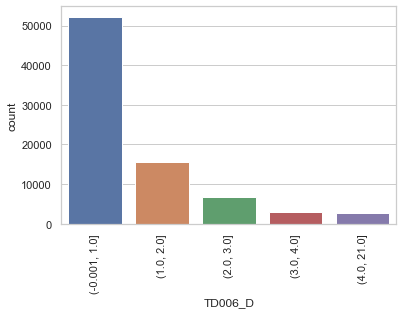

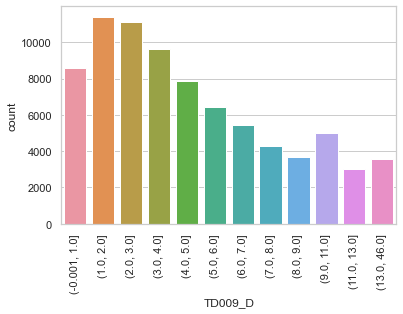

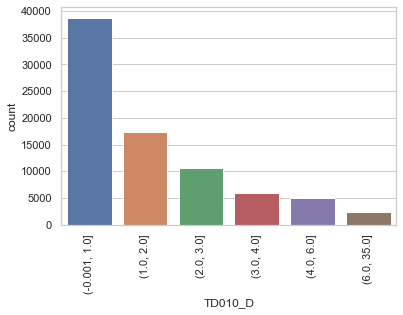

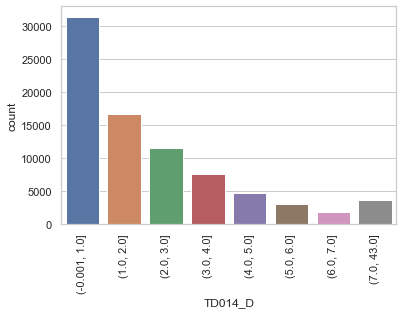

In [31]:
for i in features2:
    plt.figure(figsize=(6,4))
    g = sns.countplot(x=i, data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Passing the bins attributes to WOE function 

In [32]:
for f in features2:
    try:
        k = WOE(f)
        df = pd.merge(df,k[[f,f+'_WOE']], left_on=f, right_on=f,how='left')
    except:
        pass

#### Selecting features and append the WOE value of each variables back to the original data

In [33]:
feature3 = ['loan_default','AP001_D_WOE', 'AP003_D_WOE', 'AP008_D_WOE', 'CR009_D_WOE', 'CR015_D_WOE','CR019_D_WOE', 'PA022_D_WOE', 'PA023_D_WOE', 'PA029_D_WOE','TD001_D_WOE', 'TD005_D_WOE', 'TD006_D_WOE', 'TD009_D_WOE','TD010_D_WOE', 'TD014_D_WOE']
df2 = df[feature3]

In [34]:
df2

,loan_default,AP001_D_WOE,AP003_D_WOE,AP008_D_WOE,CR009_D_WOE,CR015_D_WOE,CR019_D_WOE,PA022_D_WOE,PA023_D_WOE,PA029_D_WOE,TD001_D_WOE,TD005_D_WOE,TD006_D_WOE,TD009_D_WOE,TD010_D_WOE,TD014_D_WOE
0,1,-0.01,-0.07,-0.01,-0.05,-0.15,-0.17,0.15,0.13,0.14,0.23,-0.05,0.14,-0.01,0.24,0.09
1,0,-0.11,-0.07,-0.10,-0.08,0.27,0.19,0.15,0.13,0.14,-0.02,0.03,0.14,0.24,0.24,0.09
2,0,0.03,0.51,0.12,-0.03,-0.22,-0.13,0.15,0.13,0.14,-0.02,-0.05,0.14,-0.01,0.24,0.30
3,0,0.04,0.51,-0.10,0.08,-0.08,0.07,0.15,0.13,0.14,0.23,0.48,0.14,0.62,0.24,0.30
4,0,0.12,-0.07,-0.10,0.08,0.27,0.19,0.15,0.13,0.14,-0.02,0.20,0.14,0.39,0.24,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,0.08,-0.07,-0.01,-0.06,-0.08,0.10,0.15,0.13,0.14,-0.02,0.20,0.14,0.11,0.24,-0.07
79996,0,-0.01,0.51,-0.10,-0.13,-0.08,-0.02,0.15,0.13,0.14,0.23,0.20,0.14,0.39,0.24,0.30
79997,0,0.11,-0.07,-0.01,0.08,-0.22,0.10,0.15,0.13,0.14,0.23,0.48,-0.09,0.62,0.02,0.09
79998,0,0.08,-0.07,0.12,-0.05,-0.15,-0.02,0.15,0.13,0.14,0.23,0.48,0.14,0.62,0.24,0.30


# Section 4: Conclusion

In our data preparation process, we carefully selected variables from four distinct categories and identified any missing values. These categories included Application (AP001, AP003, AP008), Credit Bureau (CR009, CR015, CR019), Credit Center (PA022, PA023, PA029), and Call Details (TD001, TD005, TD006, TD009, TD010, TD014).

During the exploratory data analysis phase, we utilized graphical representation to effectively illustrate the interactions between variables. Common exercises in this stage included showing the distribution of X, and exploring the distribution of Y based on another categorical variable X, and analyzing the relationships between two or three variables.

Our findings revealed relationships between each variable group and loan default:

##### Application Variables  (Age, Education, City)
- When AP001 is high, loan_default is low
- When AP003 is high, loan_default is low
- When AP008 is high, loan_default is high

##### Credit Bureau Variables (Total loan amount, Monthly Credit Card Max, Scores Debit Card Limit) 
- When CR009 is high, loan_default is low
- When CR015 is high, loan_default is low
- When CR019 is high, loan_default is low
 
##### Credit Detail Variables (Days BTW High Risk Call, Days BTW Call, AVG High Risk Inbound Calls)
- When PA022 is high, loan_default is high
- When PA023 is high, loan_default is high
- When PA029 is high, loan_default is high

##### Credit Center Variables (TD_CNT_QUERY_Last 7Day P2P, TD_CNT_QUERY_Last 1MON P2P, TD_CNT_QUERY_Last 1 MON Small Loan, TD_CNT_QUERY_3 MON P2P, TD_CNT_QUERY_3 MON Small Loan, TD_CNT_QUERY_6 MON Small Loan)  
- When TD001 is high, loan_default is high
- When TD005 is high, loan_default is high
- When TD006 is high, loan_default is high
- When TD009 is high, loan_default is high
- When TD010 is high, loan_default is high
- When TD014 is high, loan_default is high

Finally, we applied the Weight of Evidence (WOE) Encoding technique to transform continuous independent variables into a series of bins. This technique helped to better explore the data and treat outliers, while also handling missing values, as they could be grouped separately.